<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML2_nrgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.	Perform a non-linear regression algorithm to predict China’s GDP from year 1960 to 2014 from given features. Elaborate gradient descent algorithm and hyper-parameter tuning for the best result with predefined convergent criteria.
Dataset: china_gdp.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('china_gdp.csv')
print(df.head())

   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


In [ ]:
# Extract data
x_data = df["Year"].values
y_data = df["Value"].values

In [ ]:
# Normalize
x = x_data / max(x_data)
y = y_data / max(y_data)

In [ ]:
# Logistic function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [ ]:
# Gradient descent for non-linear model
def gradient_descent(x, y, L, k, x0, alpha, iterations):
    m = len(x)
    cost_history = []
    for i in range(iterations):
        y_pred = sigmoid(x, L, k, x0)
        error = y_pred - y
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)

        # Compute gradients numerically (simplified)
        dL = np.sum(error * (1 / (1 + np.exp(-k * (x - x0))))) / m
        dk = np.sum(error * L * (x - x0) * np.exp(-k * (x - x0)) / ((1 + np.exp(-k * (x - x0))) ** 2)) / m
        dx0 = np.sum(error * L * k * np.exp(-k * (x - x0)) / ((1 + np.exp(-k * (x - x0))) ** 2)) / m

        # Update parameters
        L -= alpha * dL
        k -= alpha * dk
        x0 -= alpha * dx0
        # Convergence condition
        if i > 1 and abs(cost_history[-1] - cost_history[-2]) < 1e-6:
            break
    return L, k, x0, cost_history

In [ ]:
# Initialize parameters
L = 1
k = 1
x0 = 0.5
alpha = 0.1
iterations = 10000
L_final, k_final, x0_final, cost_history = gradient_descent(x, y, L, k, x0, alpha, iterations)
print(f"Optimal parameters: L={L_final}, k={k_final}, x0={x0_final}")

Optimal parameters: L=0.22335620753293403, k=0.900065934451286, x0=0.33049893727398616


In [ ]:
# Predict using the trained model
x_range = np.linspace(min(x), max(x), 100)
y_pred = sigmoid(x_range, L_final, k_final, x0_final)

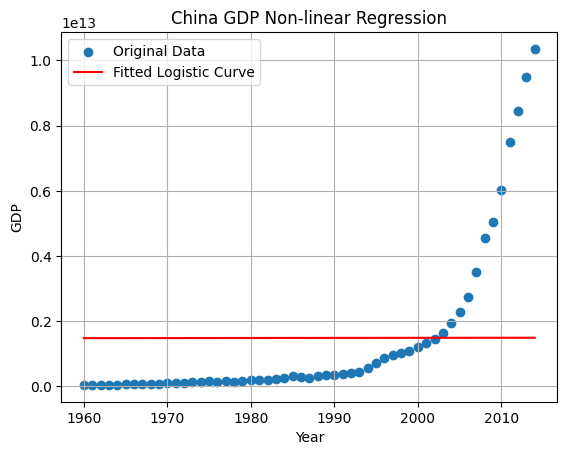

In [ ]:
# Convert back to original scale
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_range * max(x_data), y_pred * max(y_data), color='red', label='Fitted Logistic Curve')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.title("China GDP Non-linear Regression")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_fit = sigmoid(x, L_final, k_final, x0_final)
mse = mean_squared_error(y, y_fit)
r2 = r2_score(y, y_fit)
print(f"MSE: {mse:.6f}")
print(f"R² Score: {r2:.6f}")

MSE: 0.057133
R² Score: 0.001768
